# data prepation

In [1]:
#libraries importation 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# data importation 
datadf=pd.read_csv("https://raw.githubusercontent.com/Aya123-sys/alfido-task1/main/tested.csv")
datadf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# exploring the datatype of each column
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
#label of the fields(columns)
datadf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Get summary statistics
datadf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# Check for missing values
print(datadf.isnull().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


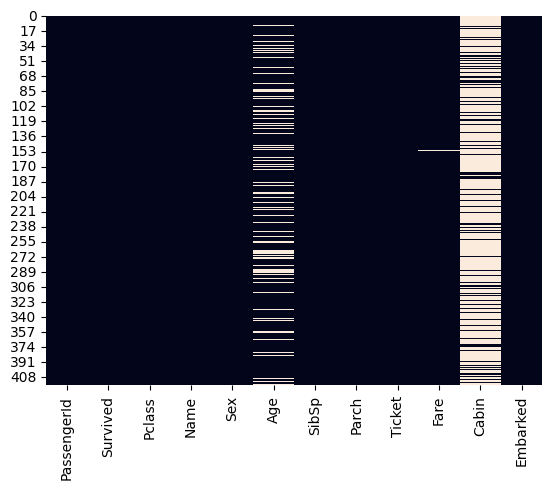

In [7]:
# plot the null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(datadf.isnull(), cbar=False)
plt.show()


In [8]:
# imputing misssing variables for age column 
imputation_value = datadf['Age'].mean()
datadf['Age'].fillna(imputation_value, inplace=True)
verification = datadf['Age'].isnull().sum()
if verification == 0 :
    print('no missing value for age column')


no missing value for age column


In [9]:
imputation_value = datadf['Fare'].mean()
datadf['Fare'].fillna(imputation_value, inplace=True)
verification = datadf['Fare'].isnull().sum()
if verification == 0 :
    print('no missing value for fare column')

no missing value for fare column


In [14]:


mode_category = datadf['Cabin'].mode()[0]  # Calculate the mode
datadf['Cabin'] = datadf['Cabin'].fillna(mode_category)
datadf




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,B57 B59 B63 B66
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,B57 B59 B63 B66
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,B57 B59 B63 B66
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,B57 B59 B63 B66
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,B57 B59 B63 B66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,B57 B59 B63 B66
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,C105
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,B57 B59 B63 B66
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S,B57 B59 B63 B66


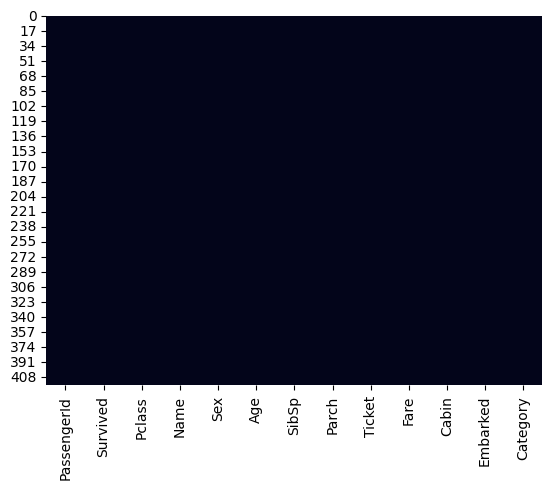

In [15]:
#plot missing values
sns.heatmap(datadf.isnull(), cbar=False)
plt.show()

# machine learnin using logistic regression


In [12]:
study_data = datadf.drop(['Survived','Name'], axis=1)
target_data = datadf['Survived']

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in study_data.columns:
    if study_data[col].dtype == 'object' or study_data[col].dtype == 'category':
        study_data[col] = label_encoder.fit_transform(study_data[col])
    else:
        pass
study_data        

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,892,3,1,34.50000,0,0,152,7.8292,76,1,15
1,893,3,0,47.00000,1,0,221,7.0000,76,2,15
2,894,2,1,62.00000,0,0,73,9.6875,76,1,15
3,895,3,1,27.00000,0,0,147,8.6625,76,2,15
4,896,3,0,22.00000,1,1,138,12.2875,76,2,15
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,267,8.0500,76,2,15
414,1306,1,0,39.00000,0,0,324,108.9000,22,0,22
415,1307,3,1,38.50000,0,0,346,7.2500,76,2,15
416,1308,3,1,30.27259,0,0,220,8.0500,76,2,15


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(study_data, target_data, test_size=0.2, random_state=42)

In [20]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
336,1228,2,1,32.00000,0,0,79,13.0000,76,2,15
31,923,2,1,24.00000,2,0,283,31.5000,76,2,15
84,976,2,1,30.27259,0,0,72,10.7083,76,1,15
287,1179,1,1,24.00000,1,0,52,82.2667,12,2,12
317,1209,2,1,19.00000,0,0,122,10.5000,76,2,15
...,...,...,...,...,...,...,...,...,...,...,...
71,963,3,1,21.00000,0,0,194,7.8958,76,2,15
106,998,3,1,21.00000,0,0,153,7.8208,76,1,15
270,1162,1,1,46.00000,0,0,33,75.2417,38,0,38
348,1240,2,1,24.00000,0,0,82,13.5000,76,2,15


In [22]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# evaluate the model

In [30]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy


1.0

In [ ]:
conf_matrix